# 🔥 Feature Transformations Overview (Lecture 5)

---

## 📌 Key Learning Objectives:

1. **Understand the Importance of Feature Transformations**
   - Why transformation is needed in machine learning
   - Impact on model performance and convergence

2. **Explore Different Scaling Techniques**
   - **Standardization (Z-score scaling)** → Mean = 0, Std = 1
   - **Min-Max Scaling** → Normalization between [0,1]
   - **Robust Scaling** → Scaling based on IQR (robust to outliers)
   - **Log Transformations** → Handling skewed data

3. **Apply Mathematical Transformations**
   - Power transformations (Box-Cox, Yeo-Johnson)
   - Square root, logarithmic, and exponential transformations

4. **Validate the Results of Transformations**
   - Visualizing the impact using histograms, boxplots, and Q-Q plots
   - Comparing distributions before and after transformations

---

## 🚀 Next Steps:
✅ **Implement each technique** with real-world datasets  
✅ **Compare models** with and without transformations  
✅ **Optimize preprocessing pipelines** for ML  

---

### 💡 Want to add more techniques or visualizations? Let me know! 😊

# Import necessary libraries

In [ ]:
# Import necessary libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd  # For handling datasets
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualization

# Import preprocessing techniques from scikit-learn
from sklearn.preprocessing import (
    StandardScaler,  # Standardization (Z-score normalization)
    MinMaxScaler,  # Min-Max scaling (rescaling)
    RobustScaler  # Robust scaling (handles outliers well)
)


In [ ]:
# Load the dataset
df = pd.read_csv('loan_applications.csv')

In [ ]:

# Define the numerical features that require scaling
numerical_features = ['income', 'loan_amount', 'monthly_payment',
                      'credit_score', 'employment_length']

# Create a copy of the dataset to preserve the original data
df_transformed = df.copy()

# 🔥🔥🔥 StandardScaler* (z-score normalization)

$$
z = \frac{x - \mu}{\sigma}
$$

where:

- \($ x $) — feature value  
- \( $mu $) — mean value  
- \( $sigma $) — standard deviation  

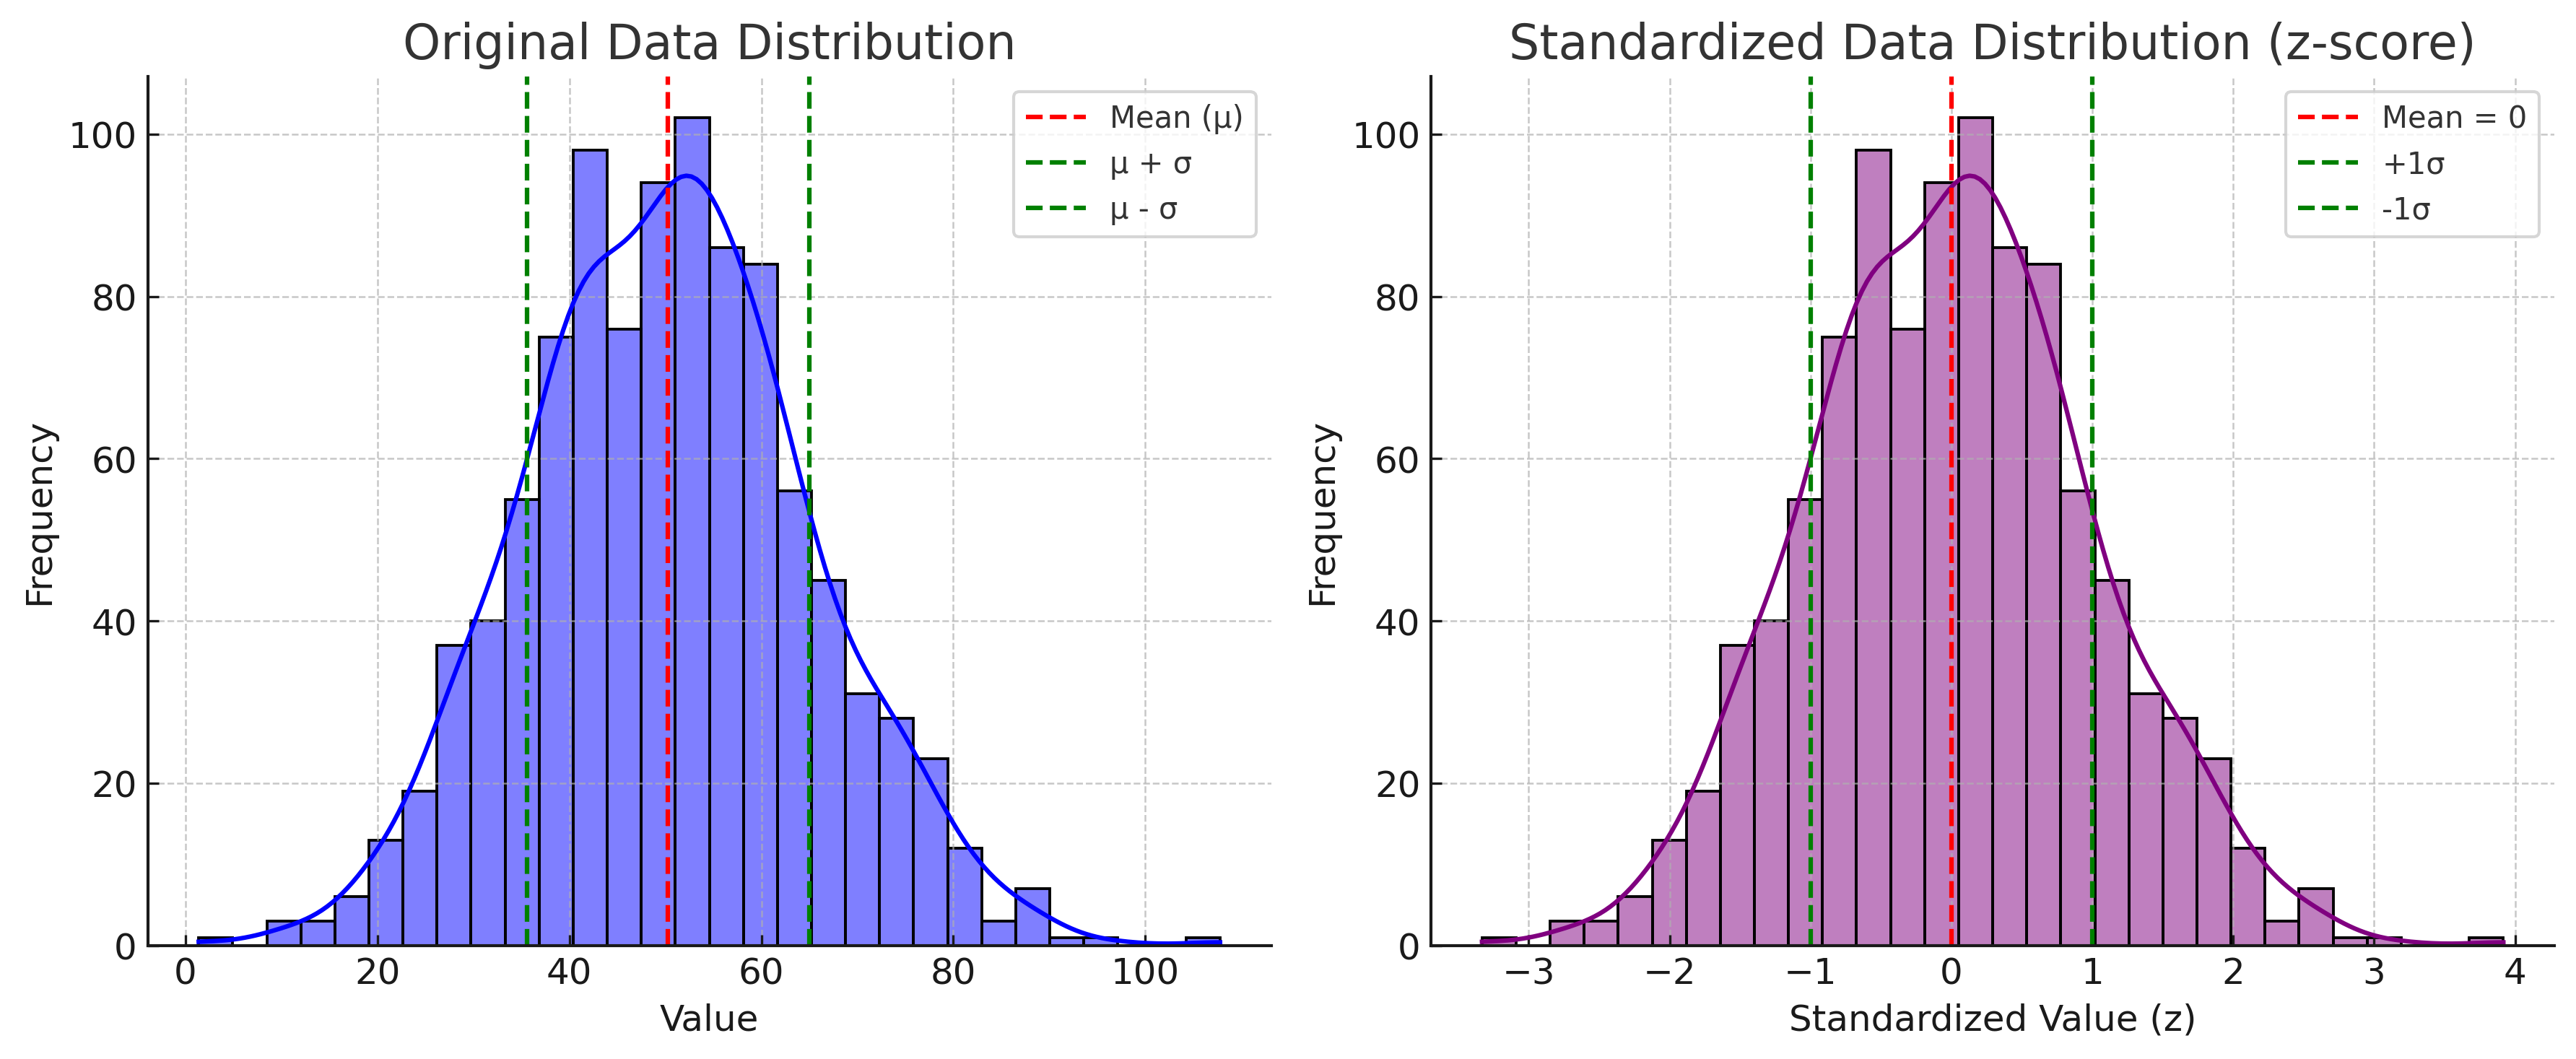

# Import StandardScaler from sklearn for feature scaling

In [ ]:
# Import StandardScaler from sklearn for feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standard scaling (Z-score normalization) to selected features
df_transformed[['income_scaled', 'loan_amount_scaled']] = scaler.fit_transform(
    df[['income', 'loan_amount']]  # Selecting the original features to scale
)

# Print the first 5 rows to verify the scaling results
print("Scaled Data Preview:")
print(df_transformed[['income', 'income_scaled', 'loan_amount', 'loan_amount_scaled']].head())

# Print summary statistics before and after scaling for comparison
print("\nOriginal Data Statistics:")
print(df[['income', 'loan_amount']].describe())

print("\nScaled Data Statistics:")
print(df_transformed[['income_scaled', 'loan_amount_scaled']].describe())

Scaled Data Preview:
     income  income_scaled  loan_amount  loan_amount_scaled
0  40298.38      -0.030625     95254.57           -0.175021
1  38167.11      -0.105556    140514.31            0.269097
2   8666.27      -1.142748     13340.61           -0.978815
3  33093.00      -0.283952     73008.42           -0.393315
4  41115.42      -0.001900     51399.26           -0.605358

Original Data Statistics:
              income   loan_amount
count   47555.000000  5.000000e+04
mean    41169.452548  1.130909e+05
std     28443.310591  1.019102e+05
min       977.790000  8.214900e+02
25%     22105.790000  4.308401e+04
50%     34830.720000  8.497724e+04
75%     52938.770000  1.504981e+05
max    429628.490000  1.761023e+06

Scaled Data Statistics:
       income_scaled  loan_amount_scaled
count   4.755500e+04        5.000000e+04
mean    3.148920e-16        1.044498e-16
std     1.000011e+00        1.000010e+00
min    -1.413059e+00       -1.101661e+00
25%    -6.702407e-01       -6.869531e-01
50%   

#  🔥🔥🔥 MinMaxScaler (between 0-1 range)

 $$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

where:

- \($ X $) — feature value  
- \( $X_{min} $) — minimum value of the feature  
- \($ X_{max} $) — maximum value of the feature  


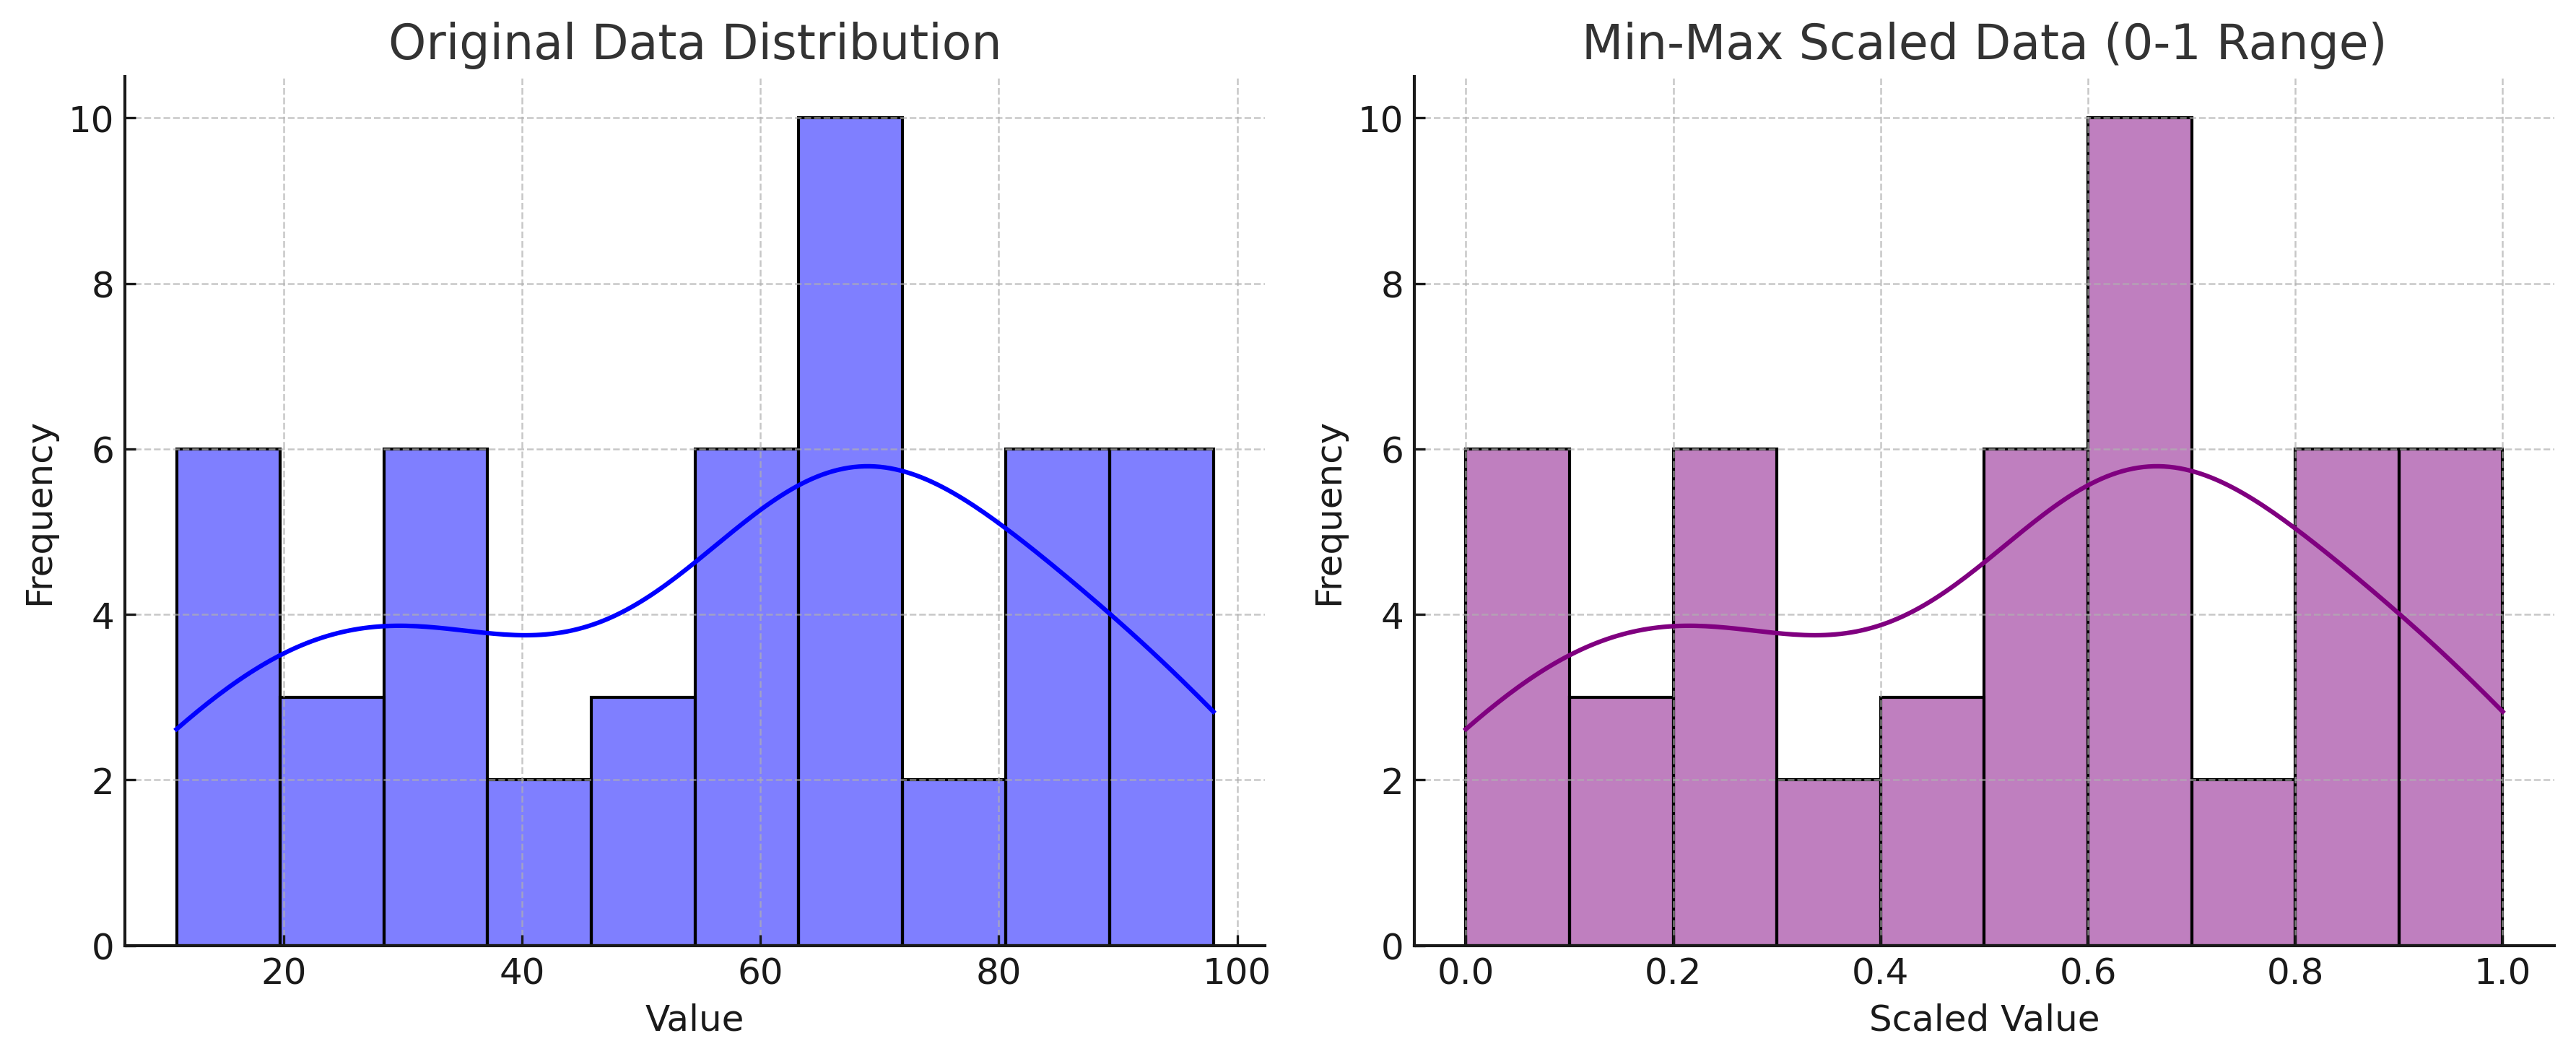

# Import MinMaxScaler from sklearn for feature scaling

In [ ]:
# Import MinMaxScaler from sklearn for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler (scales values between 0 and 1)
minmax = MinMaxScaler()

# Apply MinMax scaling to selected features
df_transformed[['credit_score_minmax', 'monthly_payment_minmax']] = minmax.fit_transform(
    df[['credit_score', 'monthly_payment']]  # Selecting the original features to scale
)

# Print the first 5 rows to verify the scaling results
print("Scaled Data Preview:")
print(df_transformed[['credit_score', 'credit_score_minmax', 'monthly_payment', 'monthly_payment_minmax']].head())

# Print summary statistics before and after scaling for comparison
print("\nOriginal Data Statistics:")
print(df[['credit_score', 'monthly_payment']].describe())

print("\nScaled Data Statistics:")
print(df_transformed[['credit_score_minmax', 'monthly_payment_minmax']].describe())

Scaled Data Preview:
   credit_score  credit_score_minmax  monthly_payment  monthly_payment_minmax
0         781.0             0.868321          2459.46                0.018712
1         687.0             0.688931          3501.53                0.026717
2         795.0             0.895038           296.01                0.002093
3         724.0             0.759542          1657.01                0.012548
4         510.0             0.351145          4461.24                0.034089

Original Data Statistics:
       credit_score  monthly_payment
count  47422.000000     50000.000000
mean     739.107798      5070.961926
std       90.489298      5931.368688
min      326.000000        23.520000
25%      677.000000      1505.325000
50%      748.000000      3210.835000
75%      820.000000      6335.617500
max      850.000000    130203.290000

Scaled Data Statistics:
       credit_score_minmax  monthly_payment_minmax
count         47422.000000            50000.000000
mean              0.7883

# 🔥🔥🔥RobustScaler (using quartiles)



$$
X_{scaled} = \frac{X_i - Q_1(X)}{Q_3(X) - Q_1(X)}
$$

where:

- \( $X_i $) — feature value  
- \( $Q_1(X) $) — first quartile (25th percentile)  
- \($ Q_3(X) $) — third quartile (75th percentile)  
- \( $Q_3(X) - Q_1(X) $) — interquartile range (IQR)  

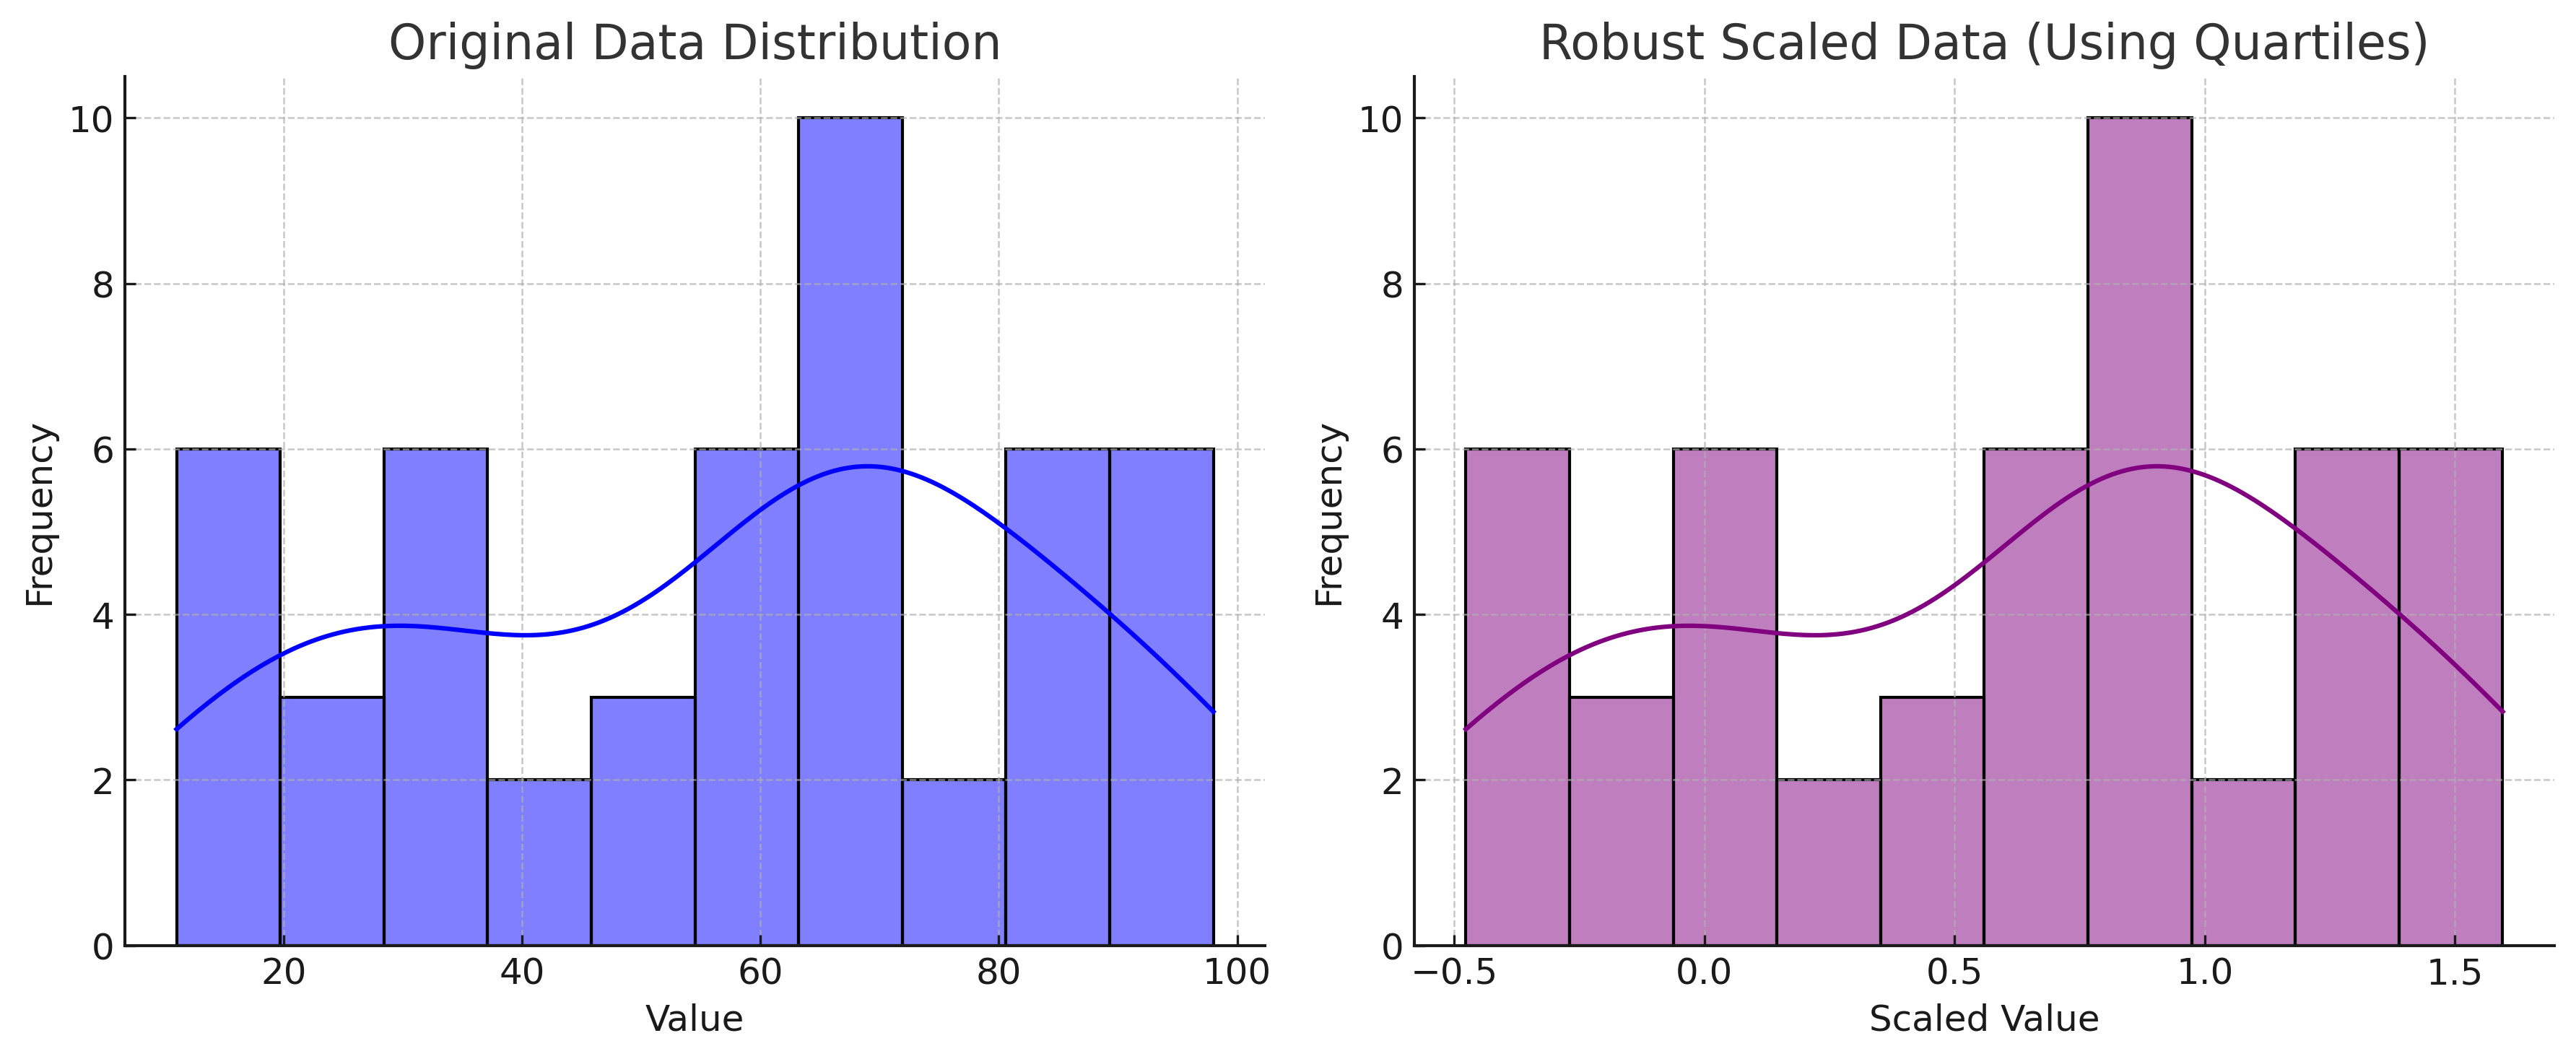

# Import RobustScaler from sklearn for feature scaling

In [ ]:
# Import RobustScaler from sklearn for feature scaling
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
# RobustScaler is less sensitive to outliers since it uses the median and interquartile range
robust = RobustScaler()

# Apply Robust scaling to 'employment_length' and store it in a new column
df_transformed[['employment_length_robust']] = robust.fit_transform(
    df[['employment_length']]  # Selecting the original feature to scale
)

# Print the first 5 rows to verify the scaling results
print("Scaled Data Preview:")
print(df_transformed[['employment_length', 'employment_length_robust']].head())

# Print summary statistics before and after scaling for comparison
print("\nOriginal Data Statistics:")
print(df[['employment_length']].describe())

print("\nScaled Data Statistics:")
print(df_transformed[['employment_length_robust']].describe())

Scaled Data Preview:
   employment_length  employment_length_robust
0          13.573526                  0.727660
1           3.061310                 -0.640993
2          12.040059                  0.528008
3           8.490862                  0.065915
4           0.782913                 -0.937632

Original Data Statistics:
       employment_length
count       42840.000000
mean            8.765176
std             6.947289
min             0.000000
25%             4.136274
50%             7.984585
75%            11.816979
max            47.284541

Scaled Data Statistics:
       employment_length_robust
count              42840.000000
mean                   0.101630
std                    0.904512
min                   -1.039564
25%                   -0.501036
50%                    0.000000
75%                    0.498964
max                    5.116712


# 🔥🔥🔥Mathematical Transformations

1. **Log Transformation** (for right-skewed data)
$$
   X' = \log(X + c)
   $$
   (where \($ c $) is a constant to avoid \($log(0)$))



2. **Square Root Transformation** (for moderate right skewness)
$$
   X' = \sqrt{X}
   $$


3. **Reciprocal Transformation** (for extreme skewness)
  $$
   X' = \frac{1}{X}
   $$


4. **Box-Cox Transformation** (flexible power transformation)
  $$
   X' = \frac{X^\lambda - 1}{\lambda}, \quad \text{for } \lambda \neq 0
   $$
   (\log transformation is used when ( $lambda = 0 $))

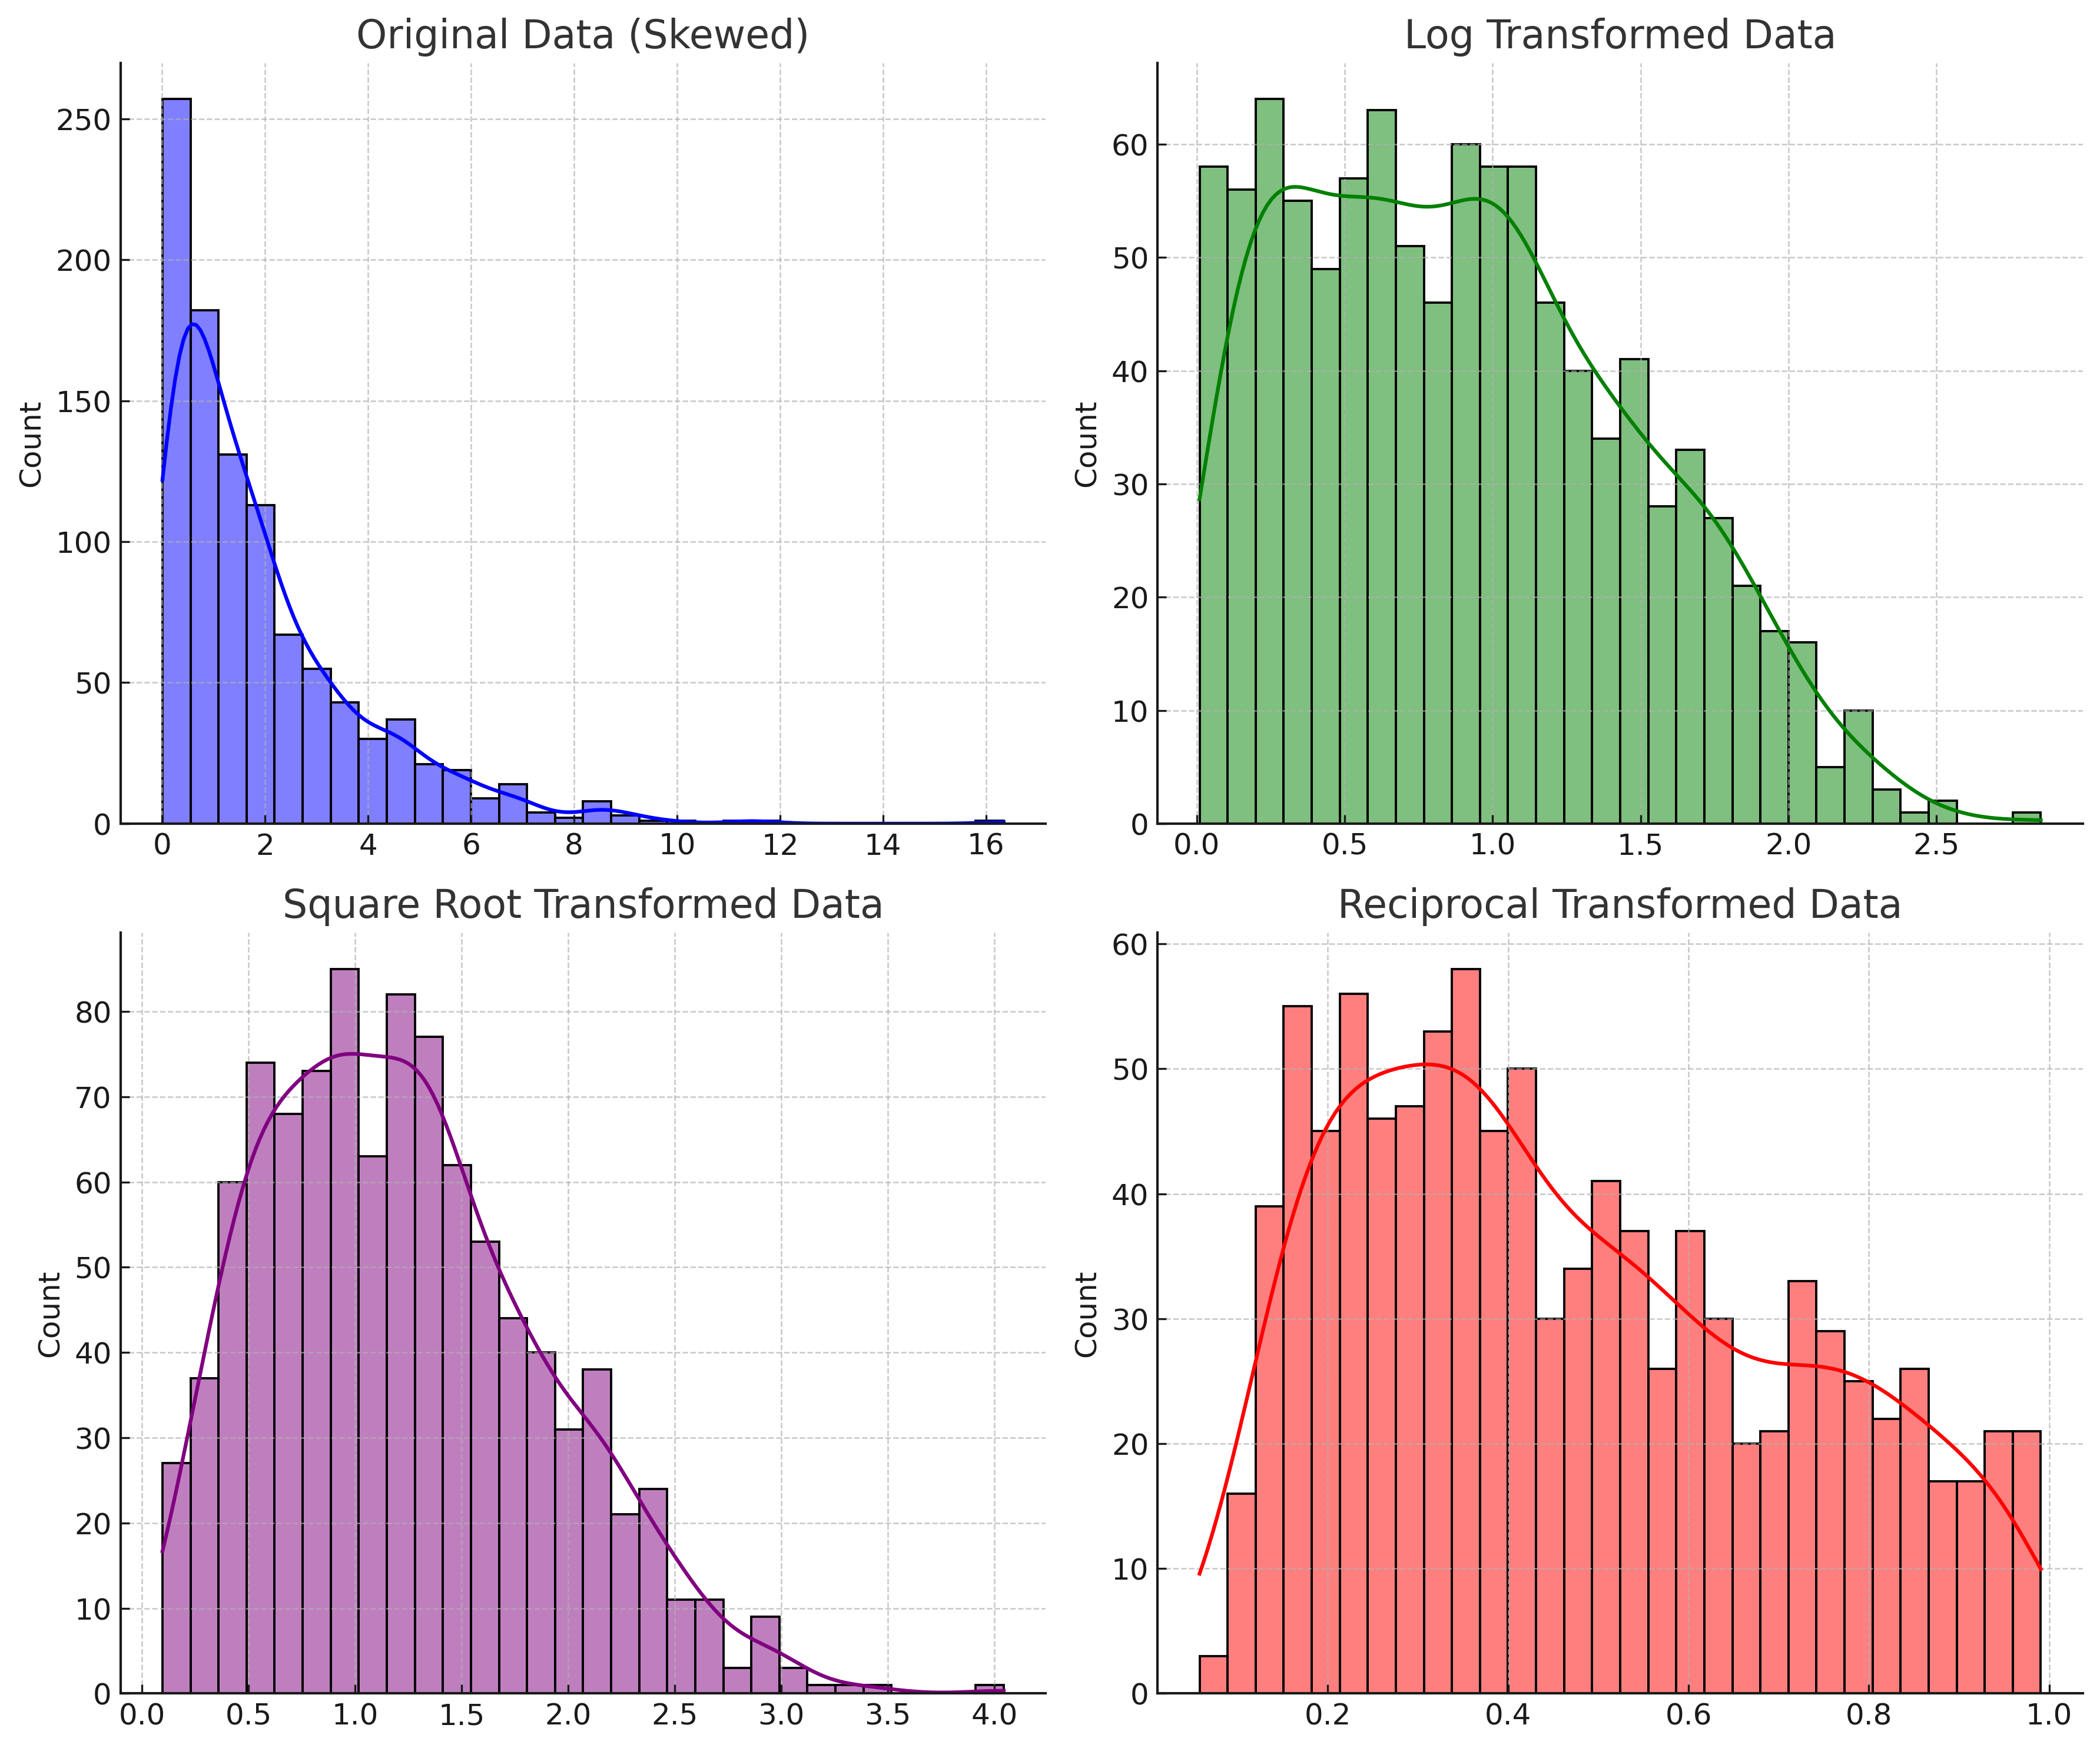

# List of transformations to apply

In [ ]:
# List of transformations to apply
log_features = ['income', 'loan_amount', 'monthly_payment']  # Log transformation (log1p)
sqrt_features = ['credit_score', 'employment_length']        # Square root transformation
square_features = ['income', 'loan_amount']                  # Power transformation (square)

# Apply log transformation using np.log1p (log(x + 1) to handle zero values safely)
for feature in log_features:
    df_transformed[f'{feature}_log'] = np.log1p(df[feature])

# Apply square root transformation using np.sqrt
for feature in sqrt_features:
    df_transformed[f'{feature}_sqrt'] = np.sqrt(df[feature])

# Apply power transformation using np.square (squaring values)
for feature in square_features:
    df_transformed[f'{feature}_squared'] = np.square(df[feature])

# Print transformed data samples to verify changes
print("\nSample Transformed Data:\n", df_transformed.head())

# Print descriptive statistics for original and transformed features to compare distributions
print("\n=== Original Data Statistics ===")
print(df[log_features + sqrt_features + square_features].describe())

print("\n=== Transformed Data Statistics ===")
print(df_transformed[[f"{feature}_log" for feature in log_features] +
                     [f"{feature}_sqrt" for feature in sqrt_features] +
                     [f"{feature}_squared" for feature in square_features]].describe())


Sample Transformed Data:
    application_id application_date  age gender    education     occupation  \
0               1       2020-01-05   40      M       Master  Self-employed   
1               2       2020-05-21   33      M     Bachelor       Salaried   
2               3       2020-09-24   42      F     Bachelor     Unemployed   
3               4       2020-05-10   53      F  High School       Salaried   
4               5       2020-05-15   32      M       Master       Salaried   

   employment_length    income  loan_amount  loan_term  ...  \
0          13.573526  40298.38     95254.57         48  ...   
1           3.061310  38167.11    140514.31         60  ...   
2          12.040059   8666.27     13340.61         60  ...   
3           8.490862  33093.00     73008.42         60  ...   
4           0.782913  41115.42     51399.26         12  ...   

   credit_score_minmax  monthly_payment_minmax  employment_length_robust  \
0             0.868321                0.018712   

#📊 Basic Ratio Features

 **Create meaningful ratio-based features from numerical variables to enhance predictive power.**  

### 🔹 Why use ratio features?
- Normalize features with different scales.  
- Capture meaningful relationships between numerical variables.  
- Improve model interpretability and performance.  

### 🛠 Common Examples

#### **1. Proportions**
Used to compare two related numerical values.
$$
\text{Ratio} = \frac{\text{Feature A}}{\text{Feature B}}
$$

#### **2. Growth Rate**
Measures the relative change over time.
$$
\text{Growth Rate} = \frac{\text{Current Value} - \text{Previous Value}}{\text{Previous Value}}
$$

#### **3. Percentage Change**
Shows how much a value has increased or decreased in percentage terms.
$$
\% \text{ Change} = \left( \frac{\text{New} - \text{Old}}{\text{Old}} \right) \times 100
$$

# 🔢 Compute financial ratios to analyze loan affordability and repayment capacity


In [ ]:
# 🔢 Compute financial ratios to analyze loan affordability and repayment capacity

# Loan-to-Income Ratio: Measures the proportion of total loan amount relative to income.
# A higher value indicates a larger loan burden compared to income.
df_transformed['loan_to_income'] = df['loan_amount'] / df['income']

# Payment-to-Income Ratio: Measures the percentage of monthly income spent on loan payments.
# Useful for assessing how much of the borrower's income is tied to loan repayment.
df_transformed['payment_to_income'] = df['monthly_payment'] / df['income']

# Payment-to-Loan Ratio: Measures how large the monthly payment is compared to the total loan.
# Helps understand the structure of loan repayment over time.
df_transformed['payment_to_loan'] = df['monthly_payment'] / df['loan_amount']

# ✅ Print the first few rows to verify calculations
print("✅ Financial ratios calculated successfully:")
print(df_transformed[['loan_to_income', 'payment_to_income', 'payment_to_loan']].head())

✅ Financial ratios calculated successfully:
   loan_to_income  payment_to_income  payment_to_loan
0        2.363732           0.061031         0.025820
1        3.681555           0.091742         0.024919
2        1.539372           0.034157         0.022189
3        2.206159           0.050071         0.022696
4        1.250121           0.108505         0.086796


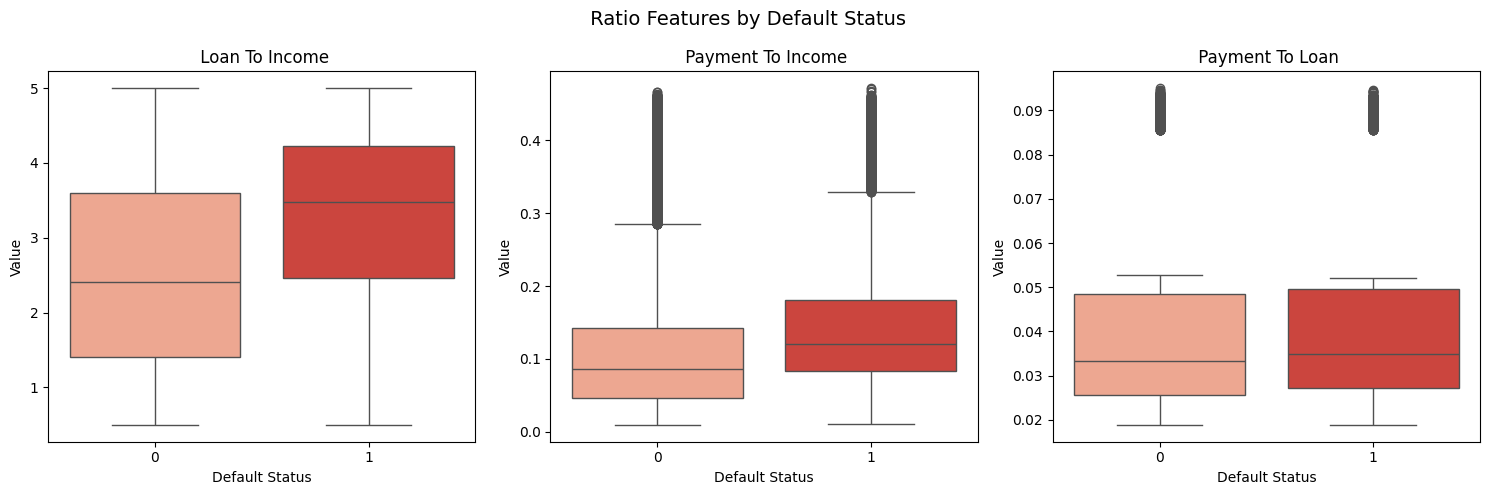

In [ ]:

# Define the ratios to visualize
ratios = ['loan_to_income', 'payment_to_income', 'payment_to_loan']

# Create subplots for each ratio
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(" Ratio Features by Default Status", fontsize=14)  # Main title

# Iterate over each ratio and plot a boxplot
for i, ratio in enumerate(ratios):
    sns.boxplot(x='default', y=ratio, data=df_transformed, ax=axes[i], palette="Reds")
    axes[i].set_title(f" {ratio.replace('_', ' ').title()}")  # Format title
    axes[i].set_xlabel("Default Status")  # Label x-axis
    axes[i].set_ylabel("Value")  # Label y-axis

plt.tight_layout()  # Adjust layout for readability
plt.show()  # Display plots

# New Section# 📚 Lecture 5 Summary: Feature Transformations 🚀

## 🔍 Overview
Feature transformations are crucial for improving the performance of machine learning models by scaling, normalizing, and reshaping data distributions. This lecture covered different techniques for transforming numerical features.

---

## 🎯 Key Learning Objectives:
1. **Understanding when and why to transform features**  
   - Handling skewed distributions  
   - Improving model convergence and performance  
   - Ensuring features have comparable scales  

2. **Applying different scaling techniques**  
   - **StandardScaler (Z-score normalization)**: Transforms data to have a mean of 0 and standard deviation of 1.  
   - **MinMaxScaler (Min-Max normalization)**: Scales data to a fixed range [0,1] or [-1,1].  
   - **RobustScaler**: Scales data using median and IQR, making it robust to outliers.  

3. **Mathematical Transformations**  
   - **Log Transformation**: Reduces right-skewed distributions.  
   - **Square Root Transformation**: Useful for reducing variance.  
   - **Power Transformation**: Adjusts distributions closer to normality.  

4. **Creating Financial Ratios**  
   - Loan-to-Income, Payment-to-Income, and Payment-to-Loan ratios  
   - Understanding debt burden and repayment capacity  

---

## 📊 Key Takeaways:
✅ Scaling ensures consistency across features and improves model training.  
✅ Log and power transformations help in normalizing skewed data.  
✅ Creating ratios from financial data provides deeper insights into borrower risk.  
✅ Visualizing transformations is essential to assess their impact.  

---

🔥 *Next Steps:* Experiment with transformations on different datasets and observe their effect on model performance!  